# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

# Import Financal Dataset

In [2]:
# Mention timeline
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2022-01-01')

#Import Dataset from yahoo finance
#Stocks
ms = yf.download('MSFT',start,end)
apple = yf.download('AAPL',start,end)
tesla = yf.download('TSLA',start,end)
boa = yf.download('BAC',start,end)
amazon = yf.download('AMZN',start,end)
bnym = yf.download('BK',start,end)
nvidia = yf.download('NVDA',start,end)
intel = yf.download('INTC',start,end)
#Bonds
vanguard = yf.download('VWEHX',start,end)
amfund = yf.download('AHTFX',start,end)
profund = yf.download('BIPSX',start,end)
fidelity = yf.download('FELAX',start,end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


# Data Manipulation

In [3]:
ms.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,21.321217,64731500
2012-01-04,26.820000,27.469999,26.780001,27.400000,21.822987,80516100
2012-01-05,27.379999,27.730000,27.290001,27.680000,22.045992,56081400
2012-01-06,27.530001,28.190001,27.530001,28.110001,22.388472,99455500
2012-01-09,28.049999,28.100000,27.719999,27.740000,22.093779,59706800


In [4]:
print(ms.shape,apple.shape,tesla.shape,boa.shape,amazon.shape,bnym.shape,nvidia.shape,intel.shape,vanguard.shape,amfund.shape,profund.shape,fidelity.shape)

(2517, 6) (2517, 6) (2517, 6) (2517, 6) (2517, 6) (2517, 6) (2517, 6) (2517, 6) (2517, 6) (2517, 6) (2517, 6) (2517, 6)


In [5]:
#Drop all columns except 'Adj Close'
ms = ms[['Adj Close']]
apple = apple[['Adj Close']]
tesla = tesla[['Adj Close']]
boa = boa[['Adj Close']]
amazon = amazon[['Adj Close']]
bnym = bnym[['Adj Close']]
nvidia = nvidia[['Adj Close']]
intel = intel[['Adj Close']]
vanguard = vanguard[['Adj Close']]
amfund = amfund[['Adj Close']]
profund = profund[['Adj Close']]
fidelity = fidelity[['Adj Close']]

In [6]:
# Merge data into single dataframe
dataframes = [ms, apple, amazon, boa, tesla, bnym, nvidia, intel, vanguard, amfund, profund, fidelity]
investments = dataframes[0] 
for df in dataframes[1:]:
    investments = investments.join(df, how='outer', rsuffix=df.columns[0])
    
investments.columns = ['ms', 'apple', 'tesla', 'boa', 'amazon', 'bnym', 'nvidia', 'intel', 'vanguard', 'amfund', 'profund', 'fidelity']
investments = investments.dropna()
investments

,ms,apple,tesla,boa,amazon,bnym,nvidia,intel,vanguard,amfund,profund,fidelity
Date,,,,,,,,,,,,
2012-01-03,21.321217,12.466093,8.951500,4.794463,1.872000,15.435969,3.220165,17.243456,3.104525,5.505174,5.773159,4.947804
2012-01-04,21.822987,12.533088,8.875500,4.802729,1.847333,15.488655,3.256862,17.643974,3.104525,5.515465,5.824724,4.941830
2012-01-05,22.045992,12.672229,8.880500,5.216043,1.808000,15.616594,3.373833,17.847750,3.109960,5.510321,5.977271,5.049392
2012-01-06,22.388472,12.804703,9.130500,5.108580,1.794000,15.390816,3.334843,17.742350,3.109960,5.515465,6.053544,5.085245
2012-01-09,22.093779,12.784389,8.928000,5.182977,1.816667,15.714428,3.334843,17.896942,3.115397,5.515465,6.070733,5.186830
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,336.971680,178.527756,169.669495,42.644634,364.646667,54.725788,309.051025,48.978291,5.573960,9.795287,46.500000,57.003429
2021-12-28,335.790894,177.498169,170.660995,42.701946,362.823334,54.669682,302.829010,48.808556,5.573960,9.795287,46.150002,56.206860
2021-12-29,336.479706,177.587250,169.201004,42.635078,362.063324,54.585510,299.623169,48.874565,5.573960,9.795287,46.830002,56.177715


In [7]:
investments.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2012-01-03 to 2021-12-31
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ms        2517 non-null   float64
 1   apple     2517 non-null   float64
 2   tesla     2517 non-null   float64
 3   boa       2517 non-null   float64
 4   amazon    2517 non-null   float64
 5   bnym      2517 non-null   float64
 6   nvidia    2517 non-null   float64
 7   intel     2517 non-null   float64
 8   vanguard  2517 non-null   float64
 9   amfund    2517 non-null   float64
 10  profund   2517 non-null   float64
 11  fidelity  2517 non-null   float64
dtypes: float64(12)
memory usage: 320.2 KB


# Market Conditions

In [8]:
# Mean Daily Return
mean_daily_ret = investments.pct_change(1).mean()
mean_daily_ret

ms          0.001219
apple       0.001212
tesla       0.001343
boa         0.001064
amazon      0.002695
bnym        0.000636
nvidia      0.002122
intel       0.000581
vanguard    0.000238
amfund      0.000235
profund     0.001048
fidelity    0.001101
dtype: float64

<Axes: xlabel='Date'>

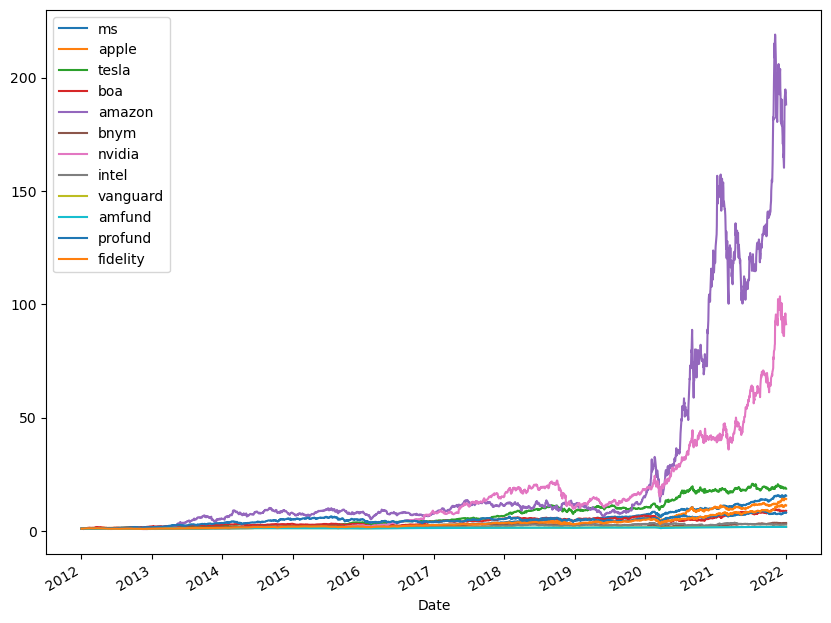

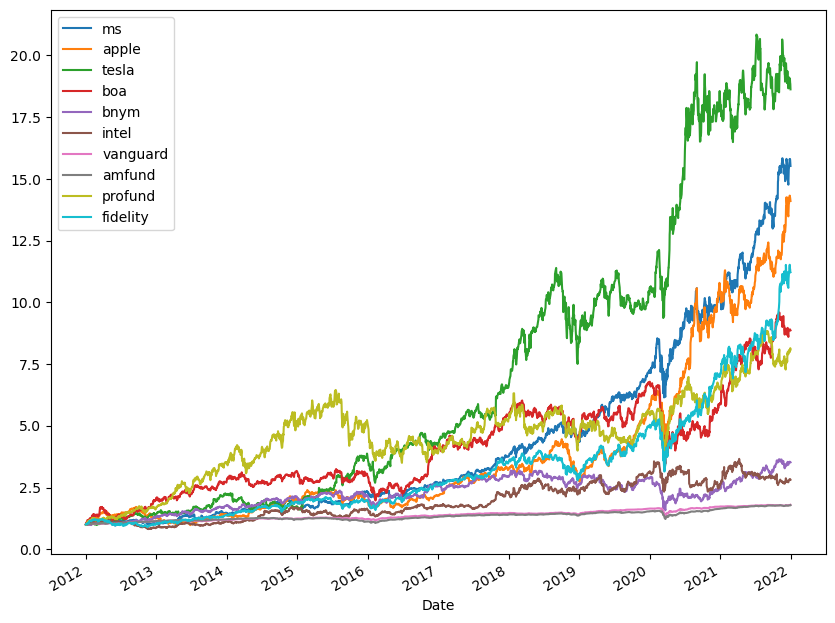

In [9]:
# Market Conditions using visalization of stocks prices wrt time
stock_normed = investments/investments.iloc[0]
stock_normed.plot(figsize=(10,8),kind='line')
stock_normed.drop('amazon',axis=1).drop('nvidia',axis=1).plot(figsize=(10,8),kind='line')

In [10]:
import matplotlib.pyplot as plt

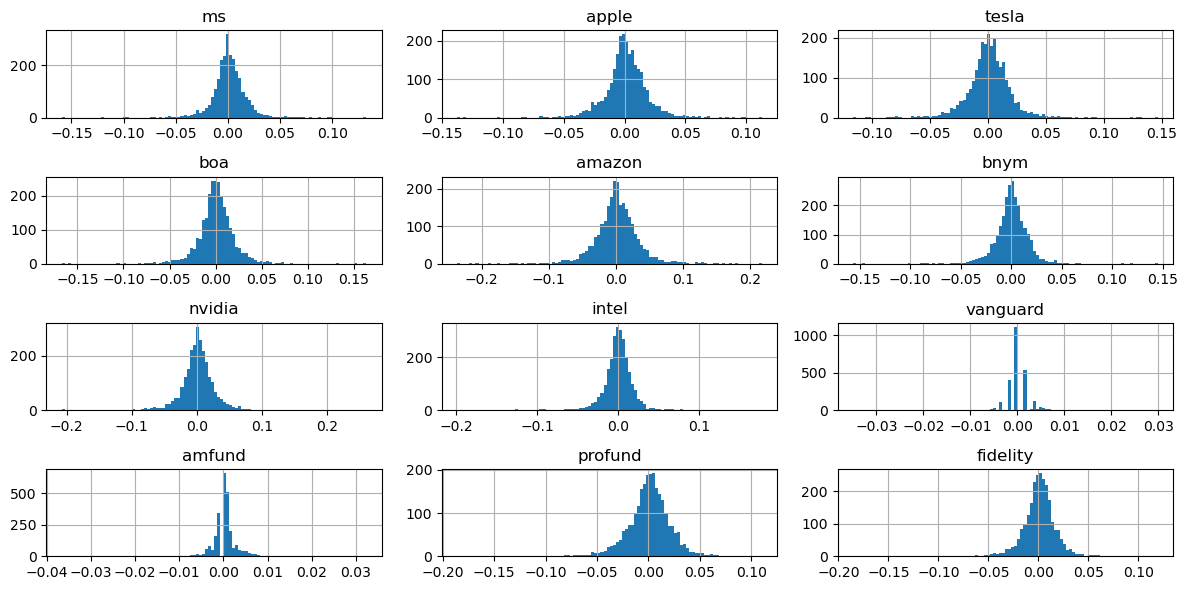

In [11]:
# Log return Values
log_ret = np.log(investments/investments.shift(1))

log_ret.hist(bins=100,figsize=(12,6));
plt.tight_layout()

In [12]:
log_ret.describe()

,ms,apple,tesla,boa,amazon,bnym,nvidia,intel,vanguard,amfund,profund,fidelity
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000
mean,0.001090,0.001052,0.001162,0.000867,0.002082,0.000500,0.001794,0.000412,0.000233,0.000230,0.000831,0.000961
std,0.016050,0.017885,0.018926,0.019814,0.034913,0.016508,0.025536,0.018441,0.002996,0.003241,0.020841,0.016719
min,-0.159454,-0.137708,-0.116503,-0.167205,-0.236518,-0.156693,-0.207712,-0.198957,-0.035023,-0.036634,-0.186060,-0.185689
25%,-0.006175,-0.006947,-0.007925,-0.008351,-0.014189,-0.007009,-0.009947,-0.007686,0.000000,-0.000953,-0.009380,-0.006791
50%,0.000721,0.000899,0.001092,0.000728,0.001427,0.000821,0.001776,0.000746,0.000000,0.000000,0.001416,0.001383
75%,0.008887,0.010308,0.010897,0.010795,0.018769,0.009003,0.013758,0.008969,0.001679,0.001007,0.012403,0.009440
max,0.132929,0.113157,0.146225,0.163786,0.218292,0.145109,0.260876,0.178324,0.029853,0.032396,0.110419,0.119294


In [13]:
# Annual Log return value
log_ret.mean() * 252

ms          0.274659
apple       0.265052
tesla       0.292913
boa         0.218554
amazon      0.524569
bnym        0.126009
nvidia      0.452041
intel       0.103708
vanguard    0.058787
amfund      0.058009
profund     0.209363
fidelity    0.242142
dtype: float64

In [14]:
# Covariance of annual log return value
log_ret.cov() * 252

,ms,apple,tesla,boa,amazon,bnym,nvidia,intel,vanguard,amfund,profund,fidelity
ms,0.064916,0.040872,0.040888,0.034364,0.048079,0.028424,0.057007,0.043192,0.003777,0.004517,0.041634,0.044308
apple,0.040872,0.080606,0.037950,0.033267,0.050866,0.024794,0.054824,0.038430,0.003959,0.004619,0.039488,0.046159
tesla,0.040888,0.037950,0.090268,0.026520,0.053602,0.020707,0.052973,0.032226,0.003044,0.003821,0.043427,0.038957
boa,0.034364,0.033267,0.026520,0.098931,0.041771,0.062624,0.045261,0.040186,0.005452,0.007013,0.044130,0.046865
amazon,0.048079,0.050866,0.053602,0.041771,0.307165,0.034218,0.074584,0.045473,0.005555,0.006523,0.058487,0.061655
bnym,0.028424,0.024794,0.020707,0.062624,0.034218,0.068676,0.036240,0.033533,0.004470,0.005551,0.037593,0.037127
nvidia,0.057007,0.054824,0.052973,0.045261,0.074584,0.036240,0.164331,0.059814,0.004798,0.005592,0.056584,0.079604
intel,0.043192,0.038430,0.032226,0.040186,0.045473,0.033533,0.059814,0.085699,0.004026,0.004705,0.041061,0.056026
vanguard,0.003777,0.003959,0.003044,0.005452,0.005555,0.004470,0.004798,0.004026,0.002262,0.002270,0.004312,0.004687
amfund,0.004517,0.004619,0.003821,0.007013,0.006523,0.005551,0.005592,0.004705,0.002270,0.002647,0.005347,0.005737


# Monte Carlo Simulation

In [15]:
np.random.seed(101)

# Stock Columns
print('Stocks')
print(investments.columns)
print('\n')

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(12))
print(weights)
print('\n')

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)

Stocks
Index(['ms', 'apple', 'tesla', 'boa', 'amazon', 'bnym', 'nvidia', 'intel',
       'vanguard', 'amfund', 'profund', 'fidelity'],
      dtype='object')


Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166 0.68527698 0.83389686
 0.30696622 0.89361308 0.72154386 0.18993895 0.55422759 0.35213195]


Rebalance to sum to 1.0
[0.08865734 0.09797444 0.00488857 0.02944751 0.11765103 0.14316668
 0.05270116 0.15341899 0.12387747 0.03260946 0.09515196 0.06045539]


Expected Portfolio Return
0.22141093977721488


Expected Volatility
0.19768758929323427


Sharpe Ratio
1.120004247959093


In [16]:
num_ports = 10000

all_weights = np.zeros((num_ports,len(investments.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(12))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [17]:
sharpe_arr.max()

1.389969499876466

In [18]:
sharpe_arr.argmax()

8992

In [19]:
all_weights[8993,:]

array([0.01842612, 0.06838818, 0.05531588, 0.13433285, 0.12343982,
       0.07345148, 0.134127  , 0.08665117, 0.10394943, 0.02223419,
       0.13329184, 0.04639204])

In [20]:
max_sr_ret = ret_arr[8993]
max_sr_vol = vol_arr[8993]
print(max_sr_ret, max_sr_vol)

0.25891504351951167 0.21436136289281202


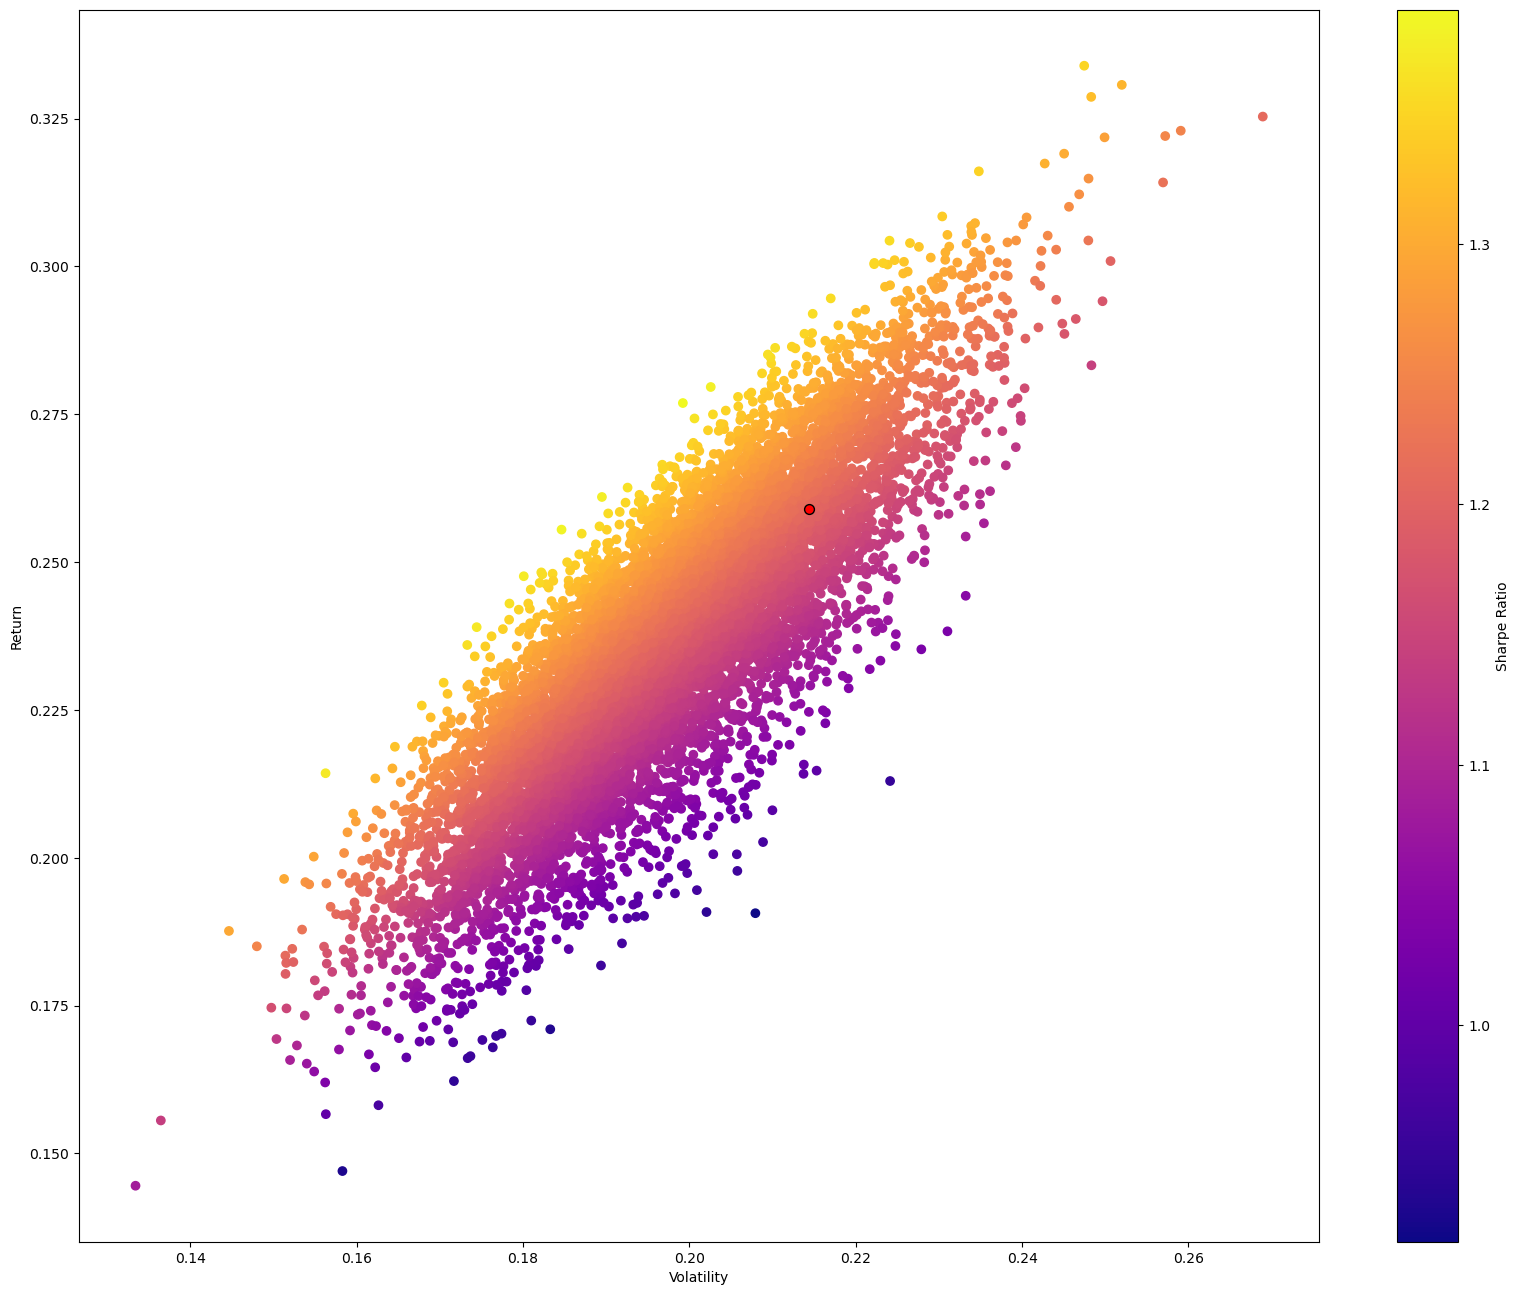

In [21]:
# Plot values obtained in simulation 
plt.figure(figsize=(20,16))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

# Portfolio Optimization

In [22]:
# Calcuate expected return, volatility and sharpe ratio
def get_ret_vol_sr(weights):
    """
    Takes in weights and returns back an array of mean return, mean volatility and sharpe ratio
    """
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [23]:
from scipy.optimize import minimize

In [24]:
# Calculate Negative Sharpe Value
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

In [25]:
# Define the stock and bond tickers
stock_tickers = ['ms', 'apple','tesla', 'boa', 'amazon', 'bnym', 'nvidia', 'intel']
bond_tickers = ['vanguard', 'amfund', 'profund', 'fidelity']

# Create a list of all tickers
all_tickers = stock_tickers + bond_tickers

In [26]:
# Define the constraints
def check_sum(weights):
    return np.sum(weights) - 1.0  # Sum of all weights must equal 1.0

def constraint_aggressive(weights):
    stock_weights = weights[:len(stock_tickers)]
    bond_weights = weights[len(stock_tickers):]
    
    return [0.9 - np.sum(stock_weights), 0.1 - np.sum(bond_weights)]

def constraint_moderate(weights):
    stock_weights = weights[:len(stock_tickers)]
    bond_weights = weights[len(stock_tickers):]
    
    return [0.6 - np.sum(stock_weights), 0.4 - np.sum(bond_weights)]

def constraint_conservative(weights):
    stock_weights = weights[:len(stock_tickers)]
    bond_weights = weights[len(stock_tickers):]
    
    return [0.1 - np.sum(stock_weights), 0.9 - np.sum(bond_weights)]

# Combine the constraints
cons = ({'type': 'eq', 'fun': check_sum})
cons_agg = ({'type': 'eq', 'fun': check_sum}, {'type': 'eq', 'fun': constraint_aggressive})
cons_mod = ({'type': 'eq', 'fun': check_sum}, {'type': 'eq', 'fun': constraint_moderate})
cons_cov = ({'type': 'eq', 'fun': check_sum}, {'type': 'eq', 'fun': constraint_conservative})

In [27]:
# Initial guess (equal distribution)
init_guess = all_weights[8993,:]

# Set bounds for each weight (0 to 1)
bounds = [(0, 1) for _ in all_tickers]

In [28]:
# Minimize the negative Sharpe Ratio to maximize the Sharpe Ratio
opt_results = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
opt_results_agg = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons_agg)
opt_results_mod = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons_mod)
opt_results_cov = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons_cov)

# Extract the optimal weights
optimal_weights = opt_results.x
optimal_weights_agg = opt_results_agg.x
optimal_weights_mod = opt_results_mod.x
optimal_weights_cov = opt_results_cov.x

In [29]:
# Calculate and display the expected return, expected volatility, and Sharpe Ratio of the optimal portfolio
expected_return, expected_volatility, sharpe_ratio = get_ret_vol_sr(optimal_weights)
print("\nExpected Portfolio Metrics (Optimal Portfolio):")
print(f"Expected Return: {expected_return:.4f}")
print(f"Expected Volatility: {expected_volatility:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")

# Display the optimal weights
print("\nOptimal Portfolio Weights:")
for ticker, weight in zip(all_tickers, optimal_weights):
    print(f"{ticker}: {weight:.4f}")


Expected Portfolio Metrics (Optimal Portfolio):
Expected Return: 0.1152
Expected Volatility: 0.0715
Sharpe Ratio: 1.6108

Optimal Portfolio Weights:
ms: 0.0333
apple: 0.0097
tesla: 0.0461
boa: 0.0000
amazon: 0.0331
bnym: 0.0000
nvidia: 0.0534
intel: 0.0000
vanguard: 0.8245
amfund: 0.0000
profund: 0.0000
fidelity: 0.0000


In [30]:
# Calculate and display the expected return, expected volatility, and Sharpe Ratio of the aggressive portfolio
expected_return, expected_volatility, sharpe_ratio = get_ret_vol_sr(optimal_weights_agg)
print("\nExpected Portfolio Metrics (Aggressive Portfolio):")
print(f"Expected Return: {expected_return:.4f}")
print(f"Expected Volatility: {expected_volatility:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")

# Display the optimal weights
print("\nAggressive Portfolio Weights:")
for ticker, weight in zip(all_tickers, optimal_weights_agg):
    print(f"{ticker}: {weight:.4f}")


Expected Portfolio Metrics (Aggressive Portfolio):
Expected Return: 0.3379
Expected Volatility: 0.2485
Sharpe Ratio: 1.3596

Aggressive Portfolio Weights:
ms: 0.1494
apple: 0.0657
tesla: 0.2584
boa: 0.0000
amazon: 0.0700
bnym: 0.0000
nvidia: 0.3564
intel: 0.0000
vanguard: 0.1000
amfund: 0.0000
profund: 0.0000
fidelity: 0.0000


In [31]:
# Calculate and display the expected return, expected volatility, and Sharpe Ratio of the moderate portfolio
expected_return, expected_volatility, sharpe_ratio = get_ret_vol_sr(optimal_weights_mod)
print("\nExpected Portfolio Metrics (Moderate Portfolio):")
print(f"Expected Return: {expected_return:.4f}")
print(f"Expected Volatility: {expected_volatility:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")

# Display the optimal weights
print("\nModerate Portfolio Weights:")
for ticker, weight in zip(all_tickers, optimal_weights_mod):
    print(f"{ticker}: {weight:.4f}")


Expected Portfolio Metrics (Moderate Portfolio):
Expected Return: 0.2666
Expected Volatility: 0.1881
Sharpe Ratio: 1.4174

Moderate Portfolio Weights:
ms: 0.0093
apple: 0.1297
tesla: 0.0892
boa: 0.0000
amazon: 0.1667
bnym: 0.0000
nvidia: 0.2052
intel: 0.0000
vanguard: 0.2541
amfund: 0.1459
profund: 0.0000
fidelity: 0.0000


In [32]:
# Calculate and display the expected return, expected volatility, and Sharpe Ratio of the conservative portfolio
expected_return, expected_volatility, sharpe_ratio = get_ret_vol_sr(optimal_weights_cov)
print("\nExpected Portfolio Metrics (Conservative Portfolio):")
print(f"Expected Return: {expected_return:.4f}")
print(f"Expected Volatility: {expected_volatility:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")

# Display the optimal weights
print("\nConservative Portfolio Weights:")
for ticker, weight in zip(all_tickers, optimal_weights_cov):
    print(f"{ticker}: {weight:.4f}")


Expected Portfolio Metrics (Conservative Portfolio):
Expected Return: 0.2589
Expected Volatility: 0.2144
Sharpe Ratio: 1.2078

Conservative Portfolio Weights:
ms: 0.0184
apple: 0.0684
tesla: 0.0553
boa: 0.1343
amazon: 0.1234
bnym: 0.0735
nvidia: 0.1341
intel: 0.0867
vanguard: 0.1039
amfund: 0.0222
profund: 0.1333
fidelity: 0.0464
